<a href="https://colab.research.google.com/github/sharansumbad/PUBG_Game_ranking_ML/blob/main/PUBG_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries Functions

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os
import random

In [ ]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
random.seed(900)

In [ ]:
# code to see the output of multiple lines of codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Loading the Data sets

In [ ]:
#reading the data 
train = pd.read_csv('F:/datasets/pubg/train_V2.csv')
test = pd.read_csv('F:/datasets/pubg/test_V2.csv')

In [ ]:
train.shape

(4446966, 29)

In [ ]:
test.shape

(1934174, 28)

# Sampling the data sets for Project Convinence

In [ ]:
train_df=train.sample(n=50000,replace="False")
train_df.shape

(50000, 29)

In [ ]:
test_df=test.sample(n=50000,replace='False')
test_df.shape

(50000, 28)

# Function for checking missing data values

In [ ]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(print('No missing value found'))

In [ ]:
check_missing_data(train)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.24872e-09
Types,object,object,object,int64,int64,float64,int64,int64,int64,int64,...,int64,float64,int64,float64,int64,int64,float64,int64,int64,float64


In [ ]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [ ]:
train.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


# Data Visualization (with the main data set not the sampled set)

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Number of groups')

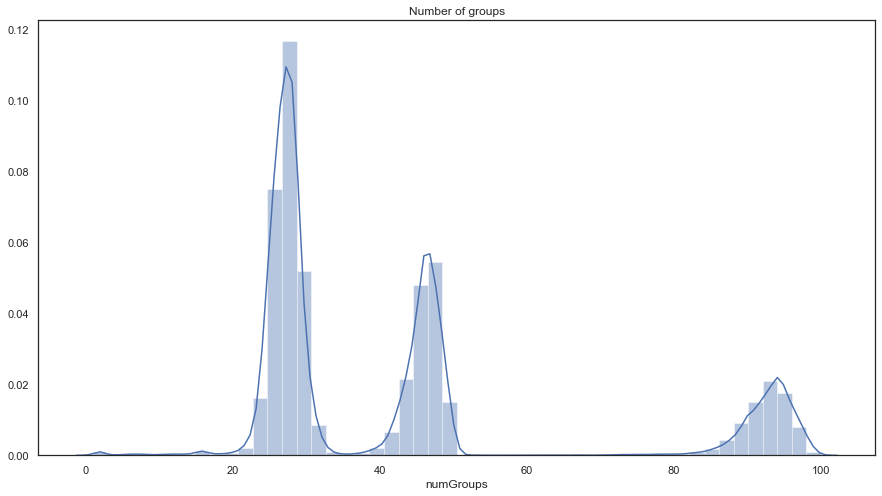

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.distplot(train["numGroups"])
ax.set_title("Number of groups")
plt.show()

In [ ]:
m_types = train.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'squad-fpp'),
 Text(0, 0, 'duo-fpp'),
 Text(0, 0, 'squad'),
 Text(0, 0, 'solo-fpp'),
 Text(0, 0, 'duo'),
 Text(0, 0, 'solo'),
 Text(0, 0, 'normal-squad-fpp'),
 Text(0, 0, 'crashfpp'),
 Text(0, 0, 'normal-duo-fpp'),
 Text(0, 0, 'flaretpp'),
 Text(0, 0, 'normal-solo-fpp'),
 Text(0, 0, 'flarefpp'),
 Text(0, 0, 'normal-squad'),
 Text(0, 0, 'crashtpp'),
 Text(0, 0, 'normal-solo'),
 Text(0, 0, 'normal-duo')]

Text(0.5, 1.0, 'Match types')

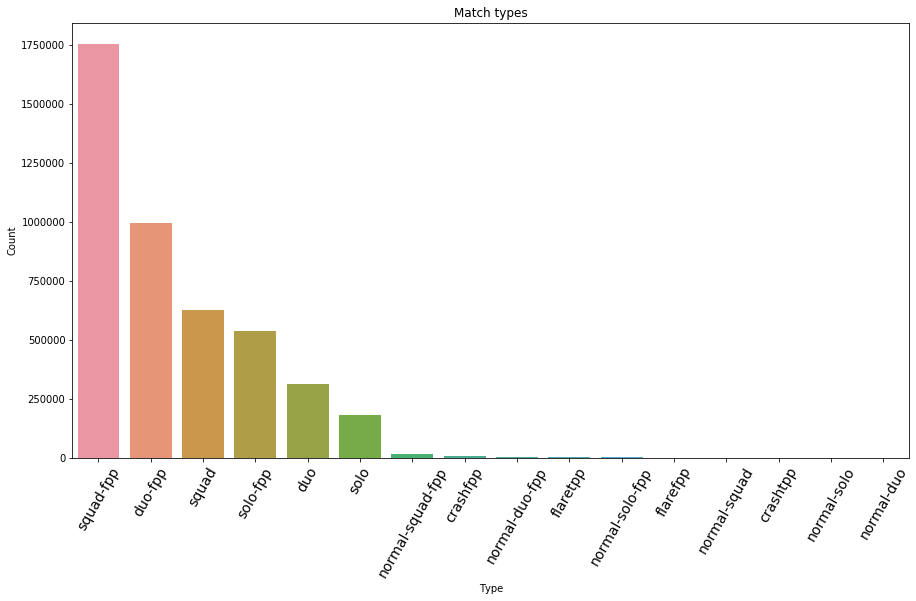

In [ ]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match types")
plt.show()

In PUBG there are essentially three main modes of game: Solo, Duo and Squad.

In a squad mode, you play in a group of 4 players. Here we can see that the match types are further broken down taking into account view modes:

FPP - First Person Perspective TPP - Thirst Peron Perspective Normal - you can switch between views during a game However, I am not able to identify what flare- and crash- types of matches are.

In [ ]:
m_types2 = train.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,2400402
duo,1315970
solo,720713


(-1.1109540714571713,
 1.1105648444435785,
 -1.1101943257388536,
 1.1004854440828025)

[None, None, None, None, None, None]

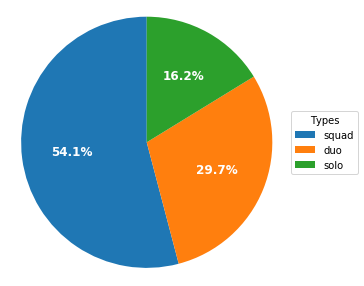

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Damage Dealt vs. Number of Kills')

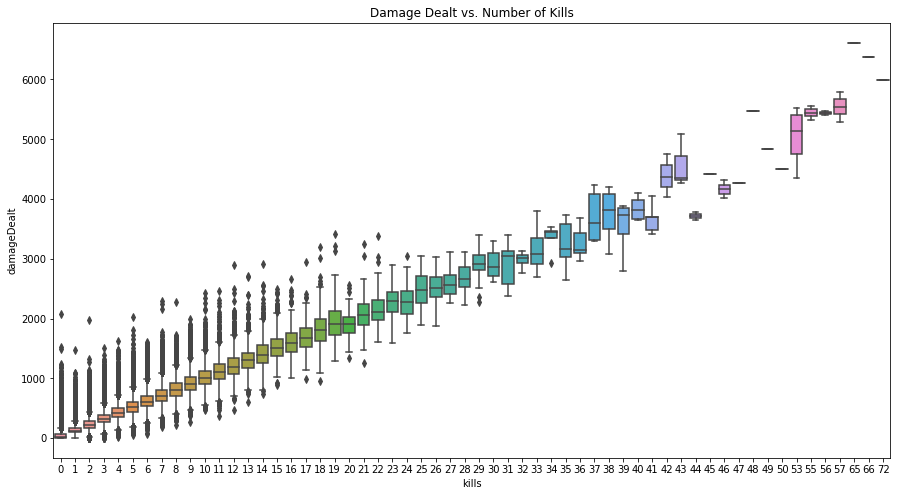

In [ ]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="kills",y="damageDealt", data = train)
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.show()
#

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Number of DBNOs vs. Number of Kills')

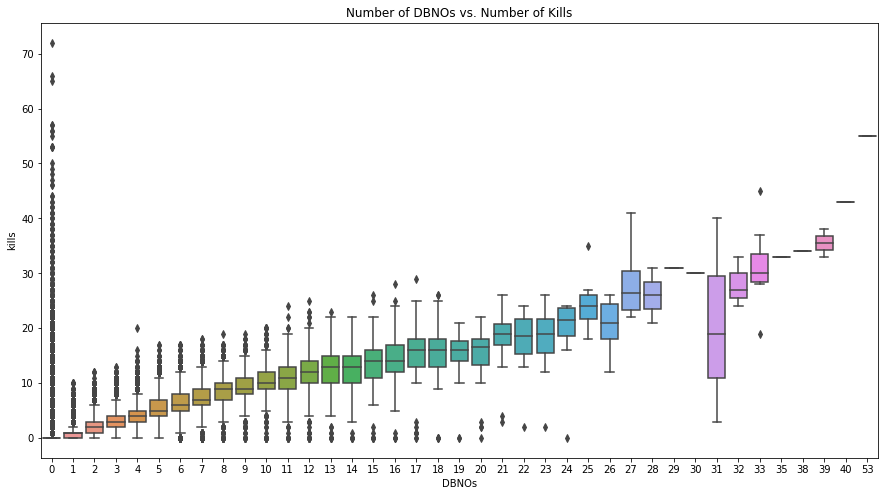

In [ ]:
plt.figure(figsize=(15,8))
ax2 = sns.boxplot(x="DBNOs",y="kills", data = train)
ax2.set_title("Number of DBNOs vs. Number of Kills")
plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Number of kill streaks vs. Number of Kills')

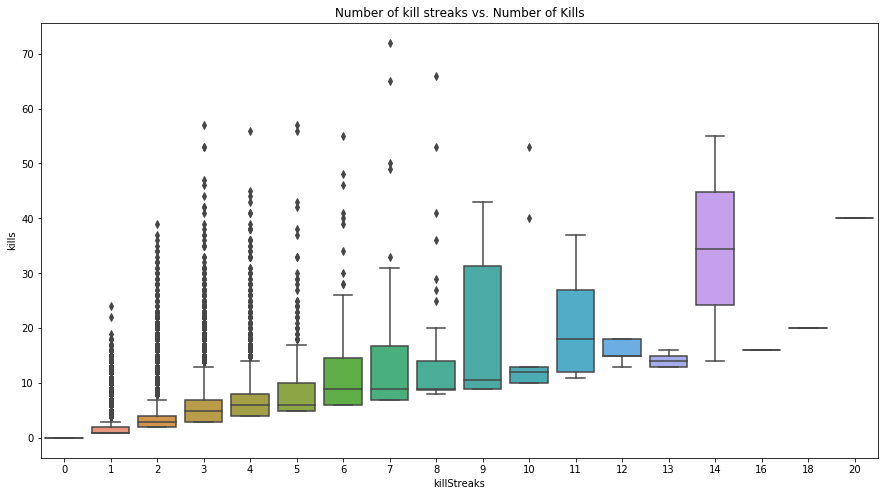

In [ ]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="killStreaks",y="kills", data = train)
ax3.set_title("Number of kill streaks vs. Number of Kills")
plt.show()

<Figure size 1080x360 with 0 Axes>

Maximum number of headshots that the player scored: 64


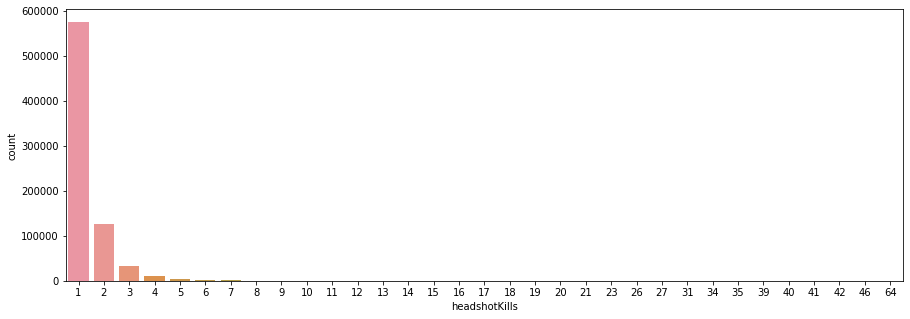

In [ ]:
headshots = train[train['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['headshotKills'].sort_values())
print("Maximum number of headshots that the player scored: " + str(train["headshotKills"].max()))

<Figure size 1080x360 with 0 Axes>

Mean number of DBNOs that the player scored: 0.6578755043326169


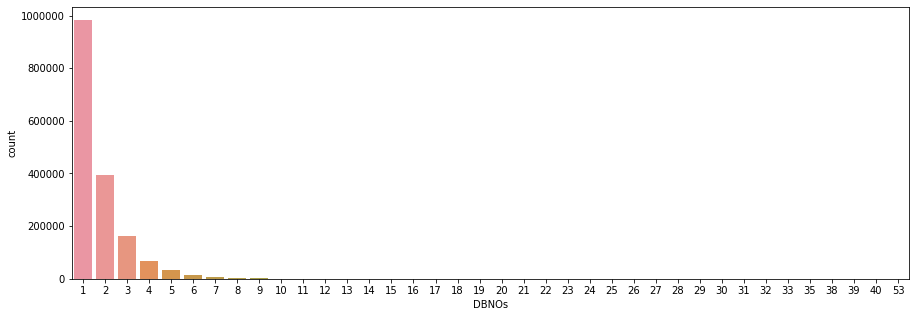

In [ ]:
headshots = train[train['DBNOs']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['DBNOs'].sort_values())
print("Mean number of DBNOs that the player scored: " + str(train["DBNOs"].mean()))

# Corelation Matrix

In [ ]:
train.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,-0.810516,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490143,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023277,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


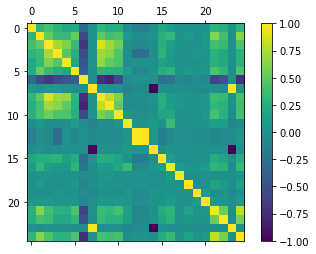

In [ ]:
corr = train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

<Figure size 648x504 with 0 Axes>

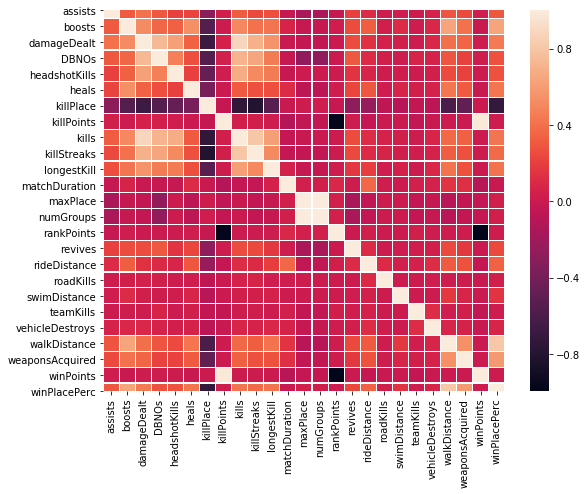

<Figure size 432x288 with 0 Axes>

In [ ]:
train_corr=train.drop(columns=['Id',"matchId","groupId"])
plt.figure(figsize=(9,7))

sns.heatmap(train_corr.corr(),linewidths=.1)
plt.show()
plt.savefig('corr')

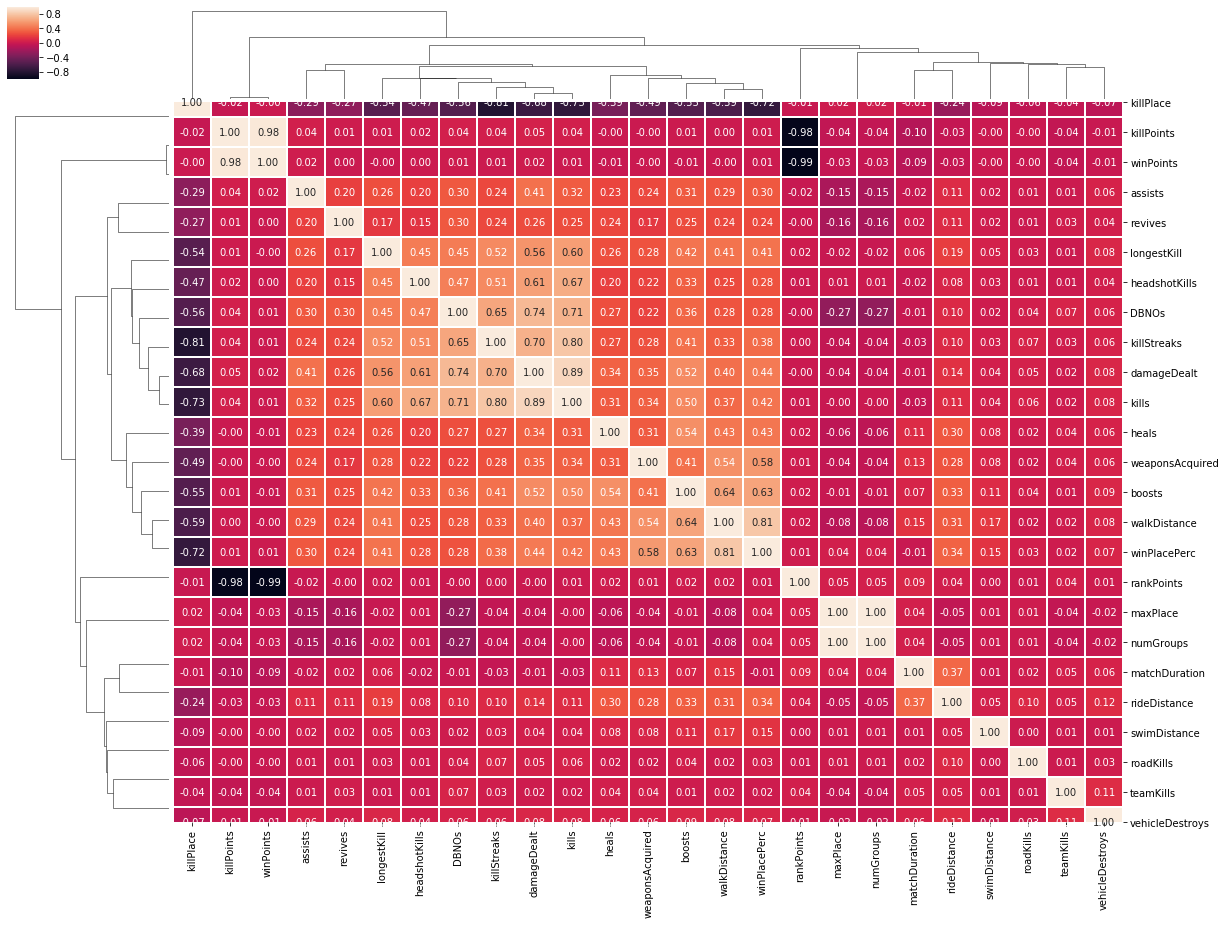

In [ ]:
ax = sns.clustermap(train.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

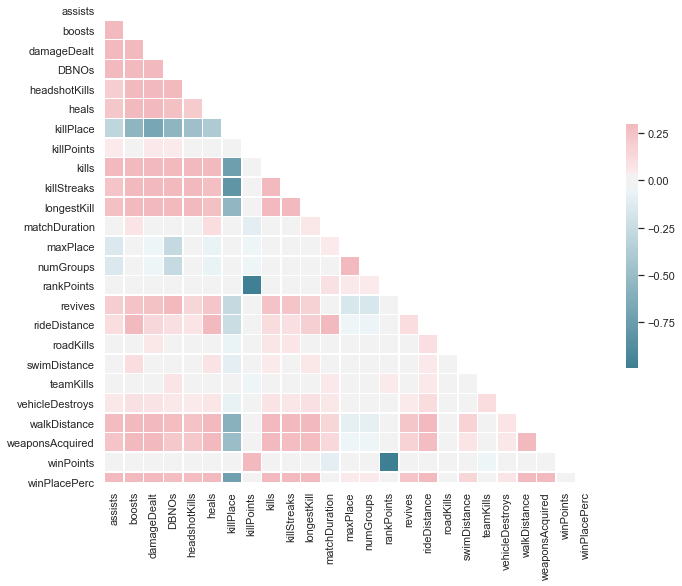

In [ ]:
sns.set(style="white")



# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

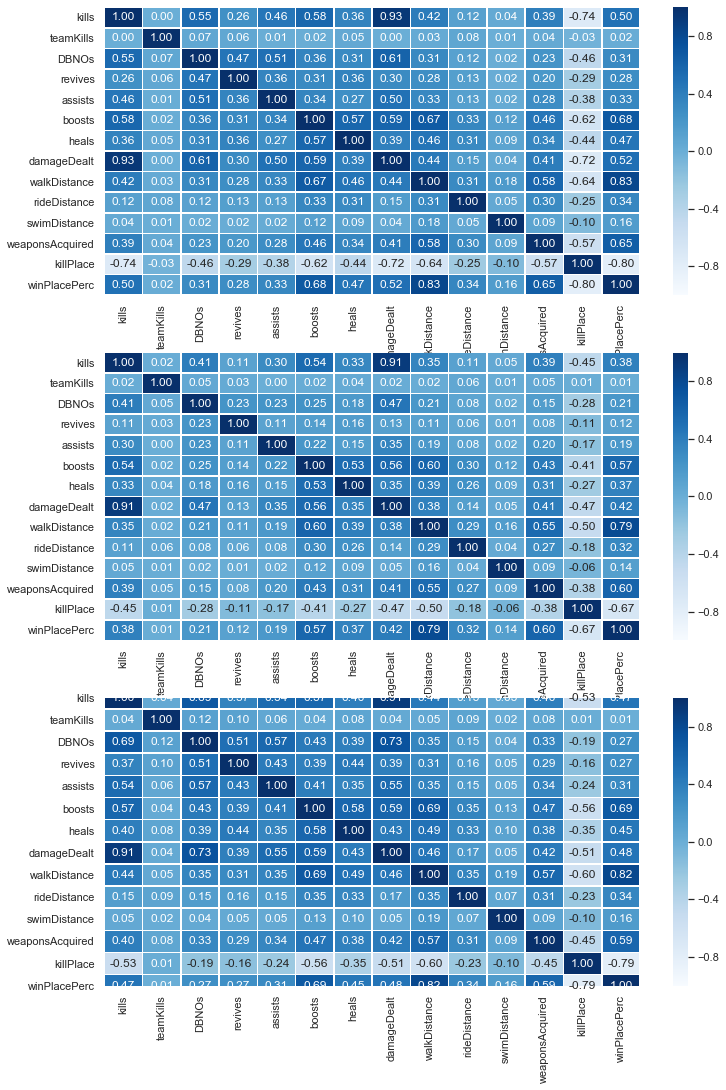

In [ ]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']
cols.extend(['killPlace','winPlacePerc'])
group = train.groupby(['matchId','groupId'])[cols]

fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharey=True)
for df, ax in zip([group.mean(), group.min(), group.max()], ax.ravel()):
    sns.heatmap(df.corr(), annot=True, linewidths=.6, fmt='.2f', vmax=1, vmin=-1, center=0, cmap='Blues', ax=ax)

del df

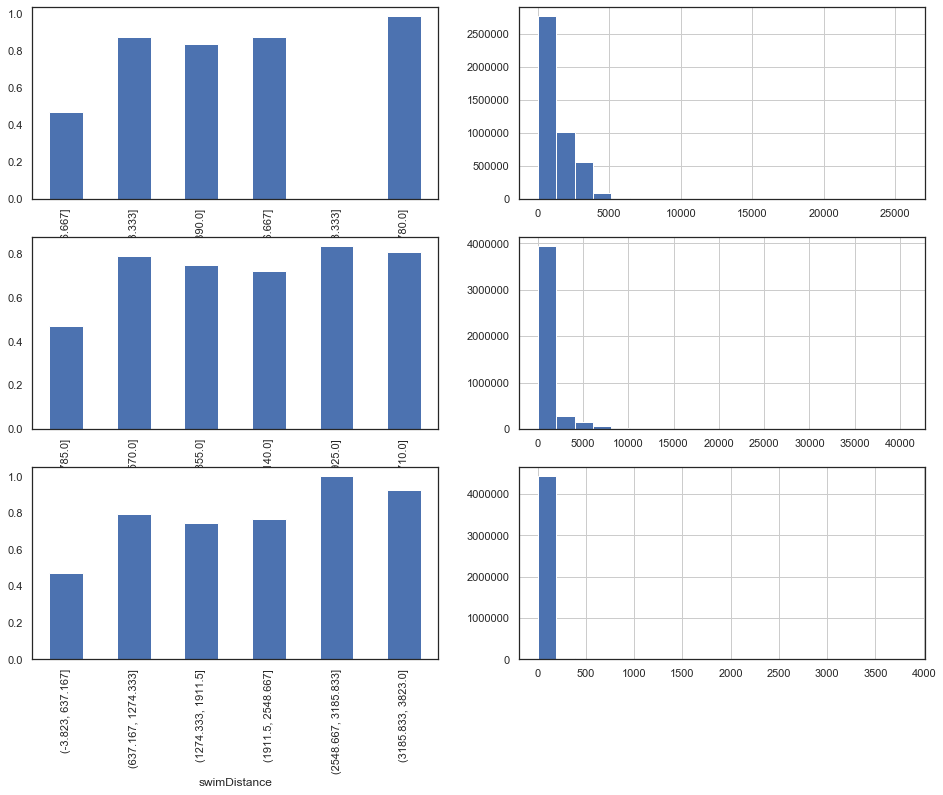

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

cols = ['walkDistance', 'rideDistance', 'swimDistance']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


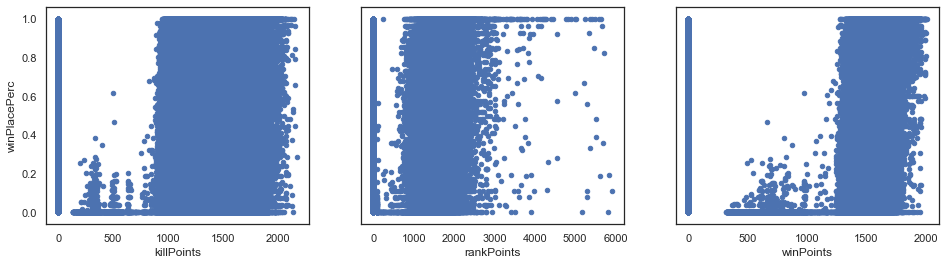

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

cols = ['killPoints','rankPoints','winPoints']
for col, ax in zip(cols, ax.ravel()): 
    train.plot.scatter(x=col, y='winPlacePerc', ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA92F837C8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA9349A7C8>]],
      dtype=object)

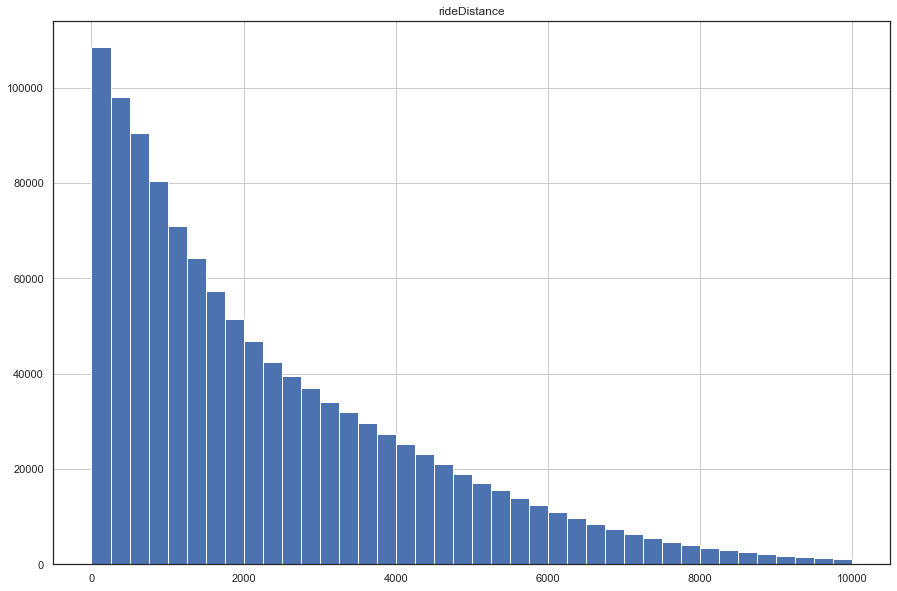

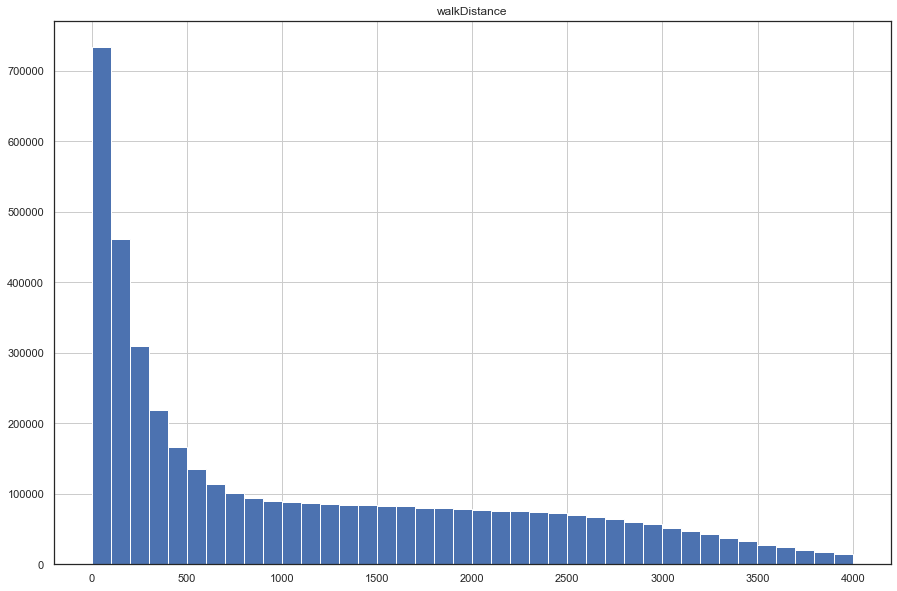

In [ ]:
ride = train.query('rideDistance >0 & rideDistance <10000')
walk = train.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=40, figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10))
plt.show()

# Feature Engineering

In [ ]:
train['winPlacePerc'].median()

0.4583

In [ ]:
def encode_features(df_train,df_test):
    features = ['matchType']
    df_combined = pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

In [ ]:
encode_features(train,test)

(                     Id         groupId         matchId  assists  boosts  \
 0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
 1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
 2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
 3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
 4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
 ...                 ...             ...             ...      ...     ...   
 4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
 4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
 4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
 4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
 4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   
 
          damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revive

In [ ]:
train['matchType']

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType, Length: 4446966, dtype: int32

In [ ]:
train.drop(['Id','groupId','matchId'], axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          int32
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int32(1), int64(19)
memory usage: 865.2 MB


In [ ]:
train.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
train.replace([np.inf, -np.inf], np.nan)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
train.fillna(train.mean(), inplace=True)

In [ ]:
train["damageDealt"] = train.damageDealt.astype(int)
train["longestKill"] = train.longestKill.astype(int)
train["rideDistance"] = train.rideDistance.astype(int)
train["walkDistance"] = train.walkDistance.astype(int)
train["swimDistance"] = train.swimDistance.astype(int)
train["winPlacePerc"] = train.winPlacePerc.astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
assists            int64
boosts             int64
damageDealt        int32
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        int32
matchDuration      int64
matchType          int32
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       int32
roadKills          int64
swimDistance       int32
teamKills          int64
vehicleDestroys    int64
walkDistance       int32
weaponsAcquired    int64
winPoints          int64
winPlacePerc       int32
dtypes: int32(7), int64(19)
memory usage: 763.4 MB


# Train Test Split

In [ ]:
train['winPlacePerc']=train['winPlacePerc'].astype("int")

In [ ]:
dep=train['winPlacePerc']

In [ ]:
ind = train[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(ind,dep,test_size=0.2,random_state=100)

In [ ]:
X_train = train.drop("winPlacePerc", axis=1)
Y_train = train["winPlacePerc"]
X_test  = test.sample(n=1934174,replace='False').copy
Y_test = train[['winPlacePerc']].sample(n=1934174,replace='False')


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sn



# Logistic Regression:

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
prediction = log_reg.predict(x_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train accuracy score is",log_reg.score(x_train,y_train))
print("Test accuracy score is",log_reg.score(x_test,y_test))

Train accuracy score is 0.9721433606965649
Test accuracy score is 0.971863988288655


In [ ]:
###Confusion matrix with sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(log_reg.predict(x_train),y_train)

array([[3444335,   87799],
       [  11303,   14135]], dtype=int64)

In [ ]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(prediction,y_train,drop_intermediate=False)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC curve')

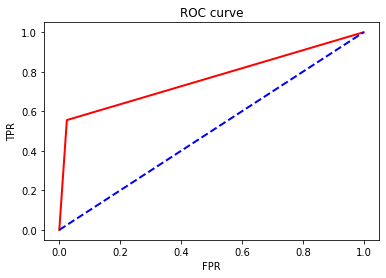

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(prediction,y_train)

0.7654037712759217

In [ ]:
recall_score(prediction,y_train, average='micro')

0.9721433606965649

In [ ]:
f1_score(prediction,y_train, average='micro')

0.9721433606965648

In [ ]:
precision_score(prediction,y_train, average='micro')

0.9721433606965649

# Decision Tree:

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train,y_train) 
Y_pred = decision_tree.predict(x_test)  


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train,y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(x_test,y_test) * 100, 2)

In [ ]:
print("Train accuracy score is",acc_decision_tree)
print("Test accuracy score is",acc_decision_tree_test)

Train accuracy score is 100.0
Test accuracy score is 95.81


In [ ]:
y_dt=y_train.sample(n=889394,replace='False')

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9414354043314886

In [ ]:
###Confusion matrix with sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[836544,  24802],
       [ 27285,    763]], dtype=int64)

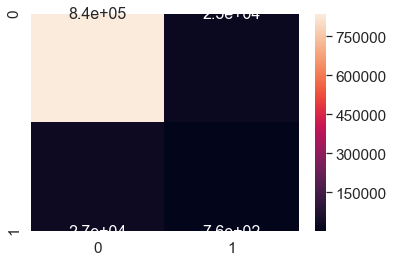

In [ ]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC curve')

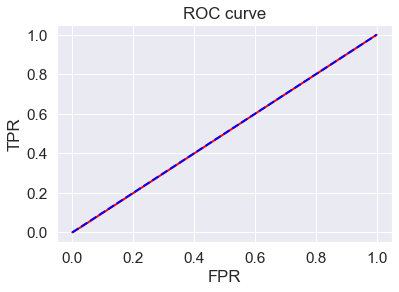

In [ ]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(Y_pred,y_dt,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_dt,Y_pred)

0.49912968967710925

In [ ]:
recall_score(Y_pred,y_dt, average='micro')

0.9414354043314886

In [ ]:
f1_score(Y_pred,y_dt, average='micro')

0.9414354043314886

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9414354043314886

# Stochastic Gradient Descent (SGD):

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train,y_train) * 100, 2)
acc_sgd_test = round(sgd.score(x_test,y_test) * 100)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

0.9714243309762951

In [ ]:
print("Train accuracy score is",acc_sgd)
print("Test accuracy score is",acc_sgd_test)

Train accuracy score is 97.14
Test accuracy score is 97.0


In [ ]:
y_dt=y_train.sample(n=889394,replace='False')

In [ ]:
###Confusion matrix with sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[863122,  25612],
       [   637,     23]], dtype=int64)

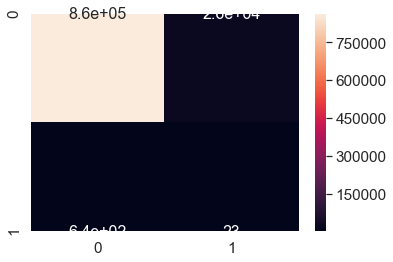

In [ ]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC curve')

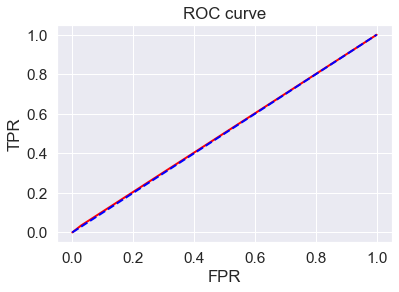

In [ ]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(Y_pred,y_dt,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9704866459634313

In [ ]:
roc_auc_score(y_dt,Y_pred)

0.50007986830926

In [ ]:
recall_score(Y_pred,y_dt, average='micro')

0.9704866459634313

In [ ]:
f1_score(Y_pred,y_dt, average='micro')

0.9704866459634313

# Perceptron:

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)
                                                                    


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
acc_perceptron = round(perceptron.score(x_train,y_train) * 100, 2)
acc_perceptron_test = round(perceptron.score(x_test,y_test) * 100, 2)

In [ ]:
print("Train accuracy score is",acc_perceptron)
print("Test accuracy score is",acc_perceptron_test)

Train accuracy score is 85.88
Test accuracy score is 85.84


In [ ]:
y_dt=y_train.sample(n=889394,replace='False')

In [ ]:
###Confusion matrix with sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[724658,  21156],
       [139511,   4069]], dtype=int64)

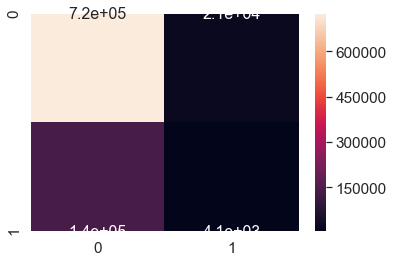

In [ ]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC curve')

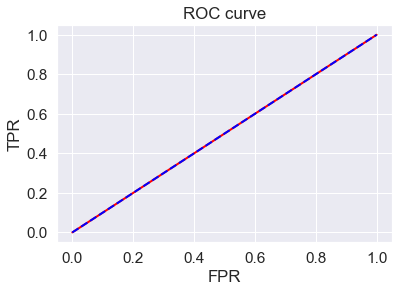

In [ ]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(Y_pred,y_dt,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.8193522780679878

In [ ]:
roc_auc_score(y_dt,Y_pred)

0.49993436950704917

In [ ]:
recall_score(Y_pred,y_dt, average='micro')

0.8193522780679878

In [ ]:
f1_score(Y_pred,y_dt, average='micro')

0.8193522780679878

# Gaussian Naive Bayes:

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(x_train,y_train)  
Y_pred = gaussian.predict(x_test)  


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
acc_gaussian = round(gaussian.score(x_train,y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(x_test,y_test) * 100, 2)

In [ ]:
print("Train accuracy score is",acc_gaussian)
print("Test accuracy score is",acc_gaussian_test)

Train accuracy score is 88.93
Test accuracy score is 88.93


In [ ]:
y_dt=y_train.sample(n=889394,replace='False')

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[758226,  22316],
       [105765,   3087]], dtype=int64)

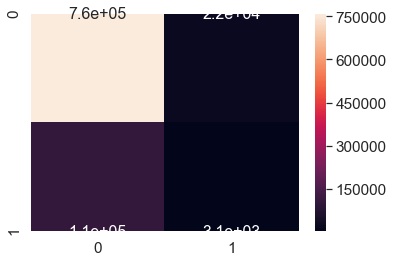

In [ ]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC curve')

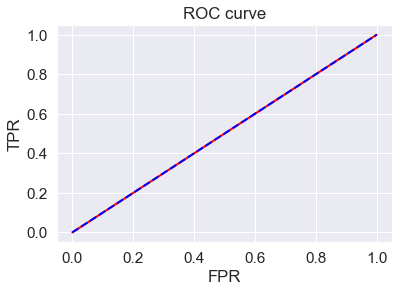

In [ ]:

##Computing false and true positive rates
fpr, tpr,_=roc_curve(Y_pred,y_dt,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.8559907082800199

In [ ]:
roc_auc_score(Y_pred,y_dt)

0.49988460889285113

In [ ]:
recall_score(Y_pred,y_dt, average='micro')

0.8559907082800199

In [ ]:
f1_score(Y_pred,y_dt, average='micro')

0.8559907082800199

# Memeory Consuming  Algorithms with sampled datasets

# Feature Engineering of sampled dataset

In [ ]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(print('No missing value found'))

In [ ]:
check_missing_data(train_df)

No missing value found


In [ ]:
train_df.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233920,0.590972,0.0,0.0,0.0000,0.0000,9.0
boosts,1.107100,1.717326,0.0,0.0,0.0000,2.0000,17.0
damageDealt,130.997110,171.899484,0.0,0.0,84.6150,184.7000,3211.0
DBNOs,0.654040,1.131926,0.0,0.0,0.0000,1.0000,25.0
headshotKills,0.229120,0.603681,0.0,0.0,0.0000,0.0000,15.0
heals,1.374240,2.705641,0.0,0.0,0.0000,2.0000,59.0
killPlace,47.619740,27.506554,1.0,24.0,48.0000,71.0000,100.0
killPoints,506.256040,628.048356,0.0,0.0,0.0000,1171.0000,2087.0
kills,0.927700,1.572667,0.0,0.0,0.0000,1.0000,31.0
killStreaks,0.544560,0.713908,0.0,0.0,0.0000,1.0000,6.0


In [ ]:
def encode_features(df_train,df_test):
    features = ['matchType']
    df_combined = pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

In [ ]:
train_df=train.sample(n=10000,replace="False")
train_df.shape

(10000, 29)

In [ ]:
test_df=test.sample(n=10000,replace="False")
train_df.shape

(10000, 29)

In [ ]:
encode_features(train_df,test_df)

(                     Id         groupId         matchId  assists  boosts  \
 922967   e57ef97cd3fe20  9e5bd65c844081  0957ae2c5ad457        0       0   
 3235651  d24e4aa58297ec  3773c7aa316972  5007fc945ad2c3        0       0   
 2468934  b0f74341368a7c  345b0d7c225448  82d5150dae66c5        0       0   
 3016046  ac56b479678c9a  353973a888828b  9ce63a26a13fc7        0       6   
 3851082  2ed04d70353aef  c7e3984635bf7c  cbe557b73bbc38        0       1   
 ...                 ...             ...             ...      ...     ...   
 1811376  0314e4da216753  b9f2d6728bbc7e  be1e7b95ae5227        0       0   
 2902956  858774d24da766  cc631d9a6134a0  614c660f79f7b8        0       1   
 2151094  a011b4a26cd86a  ead73105d2b1dd  e5c963489e8746        0       0   
 2607054  796b830a3d3189  1af7bde493e0c7  d244525f9ee57c        0       0   
 2198699  878a9e21771c8a  c43af3db25fb25  ce01c5b57f7696        0       0   
 
          damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revive

In [ ]:
train_df['matchType']

922967      3
3235651    12
2468934    11
3016046    11
3851082    12
           ..
1811376    12
2902956     3
2151094    13
2607054    11
2198699    12
Name: matchType, Length: 10000, dtype: int32

In [ ]:
train_df.drop(['Id','groupId','matchId'], axis=1, inplace=True)

In [ ]:
train_df.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [ ]:
train_df["damageDealt"] = train_df.damageDealt.astype(int)
train_df["longestKill"] = train_df.longestKill.astype(int)
train_df["rideDistance"] = train_df.rideDistance.astype(int)
train_df["walkDistance"] = train_df.walkDistance.astype(int)
train_df["swimDistance"] = train_df.swimDistance.astype(int)
train_df["winPlacePerc"] = train_df.winPlacePerc.astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 922967 to 2198699
Data columns (total 26 columns):
assists            10000 non-null int64
boosts             10000 non-null int64
damageDealt        10000 non-null int32
DBNOs              10000 non-null int64
headshotKills      10000 non-null int64
heals              10000 non-null int64
killPlace          10000 non-null int64
killPoints         10000 non-null int64
kills              10000 non-null int64
killStreaks        10000 non-null int64
longestKill        10000 non-null int32
matchDuration      10000 non-null int64
matchType          10000 non-null int32
maxPlace           10000 non-null int64
numGroups          10000 non-null int64
rankPoints         10000 non-null int64
revives            10000 non-null int64
rideDistance       10000 non-null int32
roadKills          10000 non-null int64
swimDistance       10000 non-null int32
teamKills          10000 non-null int64
vehicleDestroys    10000 non-null int64
walk

In [ ]:
train_df['winPlacePerc']=train_df['winPlacePerc'].astype("int")

In [ ]:
dep=train_df['winPlacePerc']

In [ ]:
ind = train_df[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(ind,dep,test_size=0.2,random_state=100)

# XGboost:

In [ ]:
from sklearn.metrics import accuracy_score # accuracy score / accuracy
acc_scorer = make_scorer(accuracy_score)


In [ ]:
# grid search for xgboost
parameters = {'min_child_weight': [1,2,3,4],
              'gamma': [0.5,1,1.5],
              'subsample': [0.4,0.6,0.8],
              'colsample_bytree': [0.4,0.6,0.8],
              'max_depth': [3,4,5]
              }

grid_obj = GridSearchCV(xgboost,parameters,scoring = acc_scorer)
grid_obj.fit(x_train,y_train)

In [ ]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.25)
xgboost.fit(x_train,y_train)
Y_pred = xgboost.predict(x_test)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("Train accuracy score is",xgboost.score(x_train,y_train))
print("Test accuracy score is",xgboost.score(x_test,y_test))

Train accuracy score is 0.98505
Test accuracy score is 0.9736


In [ ]:
y_dt=y_train.sample(n=10000,replace='False')

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[9621,  260],
       [ 118,    1]], dtype=int64)

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9622

In [ ]:
roc_auc_score(Y_pred,y_dt)

0.49104511757136815

In [ ]:
recall_score(Y_pred,y_dt, average='micro')

0.9622

In [ ]:
f1_score(Y_pred,y_dt, average='micro')

0.9622

# Linear Support Vector Machine:

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)

Y_pred = linear_svc.predict(x_test)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
acc_linear_svc = round(linear_svc.score(x_train,y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(x_test,y_test) * 100, 2)

In [ ]:
print("Train accuracy score is",acc_linear_svc)
print("Test accuracy score is",acc_linear_svc_test)

Train accuracy score is 96.86
Test accuracy score is 97.35


In [ ]:
y_dt=y_train.sample(n=10000,replace='False')

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[9727,  273],
       [   0,    0]], dtype=int64)

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9727

In [ ]:
f1_score(Y_pred,y_dt, average='micro')


0.9727

# K Nearest Neighbor:

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train,y_train) 
Y_pred = knn.predict(x_test)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
acc_knn = round(knn.score(x_train,y_train) * 100, 2)
acc_knn_test = round(knn.score(x_test,y_test) * 100, 2)

In [ ]:
print("Train accuracy score is",acc_knn)
print("Test accuracy score is",acc_knn_test)

Train accuracy score is 97.59
Test accuracy score is 96.85


In [ ]:
y_dt=y_train.sample(n=2000,replace='False')

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[1921,   57],
       [  22,    0]], dtype=int64)

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9605

In [ ]:
f1_score(Y_pred,y_dt, average='micro')

0.9605

In [ ]:
roc_auc_score(y_dt,Y_pred)

0.4943386515697375

# Random Forest:

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

1.0

In [ ]:
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)

In [ ]:
print("Train accuracy score is",acc_random_forest)
print("Test accuracy score is",acc_random_forest_test)

Train accuracy score is 100.0
Test accuracy score is 97.3


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
df_cm=confusion_matrix(Y_pred,y_dt)
df_cm

array([[1921,   57],
       [  22,    0]], dtype=int64)

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9605

In [ ]:
roc_auc_score(y_dt,Y_pred)

0.4943386515697375

In [ ]:
precision_score(Y_pred,y_dt, average='micro')

0.9605

In [ ]:
acc_log=97.21433606965649
acc_gaussian=88.93
acc_perceptron=85.88
acc_sgd=97.14
acc_decision_tree=100.0

# Which is the best Model ?

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.000000,Random Forest
100.000000,Decision Tree
97.590000,KNN
97.214336,Logistic Regression
97.140000,Stochastic Gradient Decent
96.860000,Support Vector Machines
88.930000,Naive Bayes
85.880000,Perceptron


# K-Fold Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train,y_train,cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.97003745 0.96878901 0.97       0.96875    0.96875    0.965
 0.9725     0.97125    0.96871089 0.96996245]
Mean: 0.9693749808593453
Standard Deviation: 0.0018751565045205673
